In [1]:
# general imports usually needed
import numpy as np
import matplotlib as mpl
import matplotlib.animation
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd

In [2]:
# libraries more specific to this lecture notebook
import os.path
import sys
sys.path.append('../../src')
from ml_python_class.config import DATA_DIR

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [3]:
# notebook wide settings to make plots more readable and visually better to understand
np.set_printoptions(suppress=True)

#%matplotlib widget
#%matplotlib inline

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('figure', titlesize=18)
plt.rc('legend', fontsize=14)
plt.rcParams['figure.figsize'] = (12.0, 8.0) # default figure size if not specified in plot
plt.style.use('seaborn-darkgrid')


# 4. (Chapter 4) Training Models

In this chapter we will begin our study of Machine Learning algorithms in earnest.  Up
to this point you have gotten a taste of using some ML models as black boxes.
You don't really know internally what they are doing or how they work.  But still, learning
the API of how to create data sets and set up models for training, and knowning in
general what supervisied learning is and how you train a model to fit a dataset is
sufficient to start working with ML.

However, at some point you will be working with a dataset and you will get some
weird or unexpected results.  Also there are myriads of parameters and hyper-parameters,
not to mention issues with formatting and cleaning your data, and tweaking
training procedures, etc. that will all always be a bit mysterious and/or you will only
learn by wrote checklists, if you don't understand some of the fundamentals of the
internal implemenations of the various ML algorithms you use.

Understanding whats under the hood will help you quickly understand what types of ML
models will be promising or not for the data you have.  It will give you an understanding
of the hyper parameters the model uses, and what you might want to try for these parameters
to get good results.  Understanding whats under the hood will also allow you to debug
and spot issues you have with training and debugging your models.  It will allow you
to perform error analysis, and better understand why your models may be working, and why
they may be failing, so that you can tweak things to improve their performance.

In short, while you can be a push-button/check-list using data analyst, if you eventually
want to improve your skills and become a better data scientist, you need to start
learning the internal working of ML algorithms.  Our goal in this class is to begin
your journey along this path.  We won't become deep experts on any of the ML methods we 
will look at, but we hope to introduce you to the fundamental concepts and inner
workings, so that you can beging to understand more deeply how the techniques work.

In this chapter, and units of our course, we will begin by looking at **linear regression**
(which we have used already), followed by **logistic regression**.  These units are very
important, as these models have basic concepts that are often similar across many types
of ML algorithms.  We will look at the idea of the **cost function** (or **fitness function**),
and how this can be used with techniques like **gradient descent** to fit the parameters
of a model in general to make predictions about a set of data.  Linear regression
is a technique for performing regression modeling (predict real valued outputs), while
logistic regression is usefule for classification (despite its name, which is a bit
misleading at best).  By comparing similarities and differences of cost functions and
fitting models between regression and classification tasks, we will illustrate some general
principles of ML that apply to many types of supervisied learning models, whether
regression or classification tasks.

## 4.5 Regularized Linear Models

In practice we will never know what the right complexity of the model is we should use to get
the best balance of bias and variance.  But if the model seems like it might be overfitting, we
can try and reduce this by **regularizing** the model.  For example, a good way to reduce overfitting
and regularize a polynomial regression is to reduce the number of polynomial degrees.

Most ML supervised learning models have similar ways to regularize them.  For a linear model (like many
other types of methods) regularization is typically achieved by constraining the weights of
the model in some way.

### Ridge Regression

**Ridge regression** is a regularized version of linear regression.  We simply add in 
a **regularization term** to the cost function, like this:

$$
\text{regularization penality} = \alpha \sum_{i=1}^{n} \theta_i^2
$$

We basically sum up the square of the $n$ parameters/weights of the linear model.  Thus if these
parameters are really high, the regularization penality will be high.  So for example, for a
polynomial regression with many high-degree terms, this penality will tend to make the
fitting want to reduce the weights to small or 0 values, especially when the high-degree
terms are not hellping the model in reducing the RMSE error for the data much.

The regularization penality term should only be added to the cost function during training.  Once
trained, you want to evaluate the model's error performance using the unregularized performance
measure.

The hyperparameter $\alpha$ controls how much weight is given to the regularization penalty.
Of course if $\alpha = 0$ then there is no penality, and ridge regression simply reduces
to regular linear regression.  But if $\alpha$ is very large, then all weights
will tend to end up very close to zero, and the result will be a flat line going through the
data's mean.

So for example, for ridge regression the cost function (often called $J(\theta)$) looks like
this:

$$
J(\theta) = MSE(\theta) + \alpha \frac{1}{2}\sum_{i=1}^n \theta_i^2
$$

Notice that the summation is summing over the $n$ features we are fitting (not the m samples) because
we are penalizing based on the feature weight parameter values.  Notice also that
the sum starts at $i = 1$, so we do not include the bias/intercept term $\theta_0$ in our
regularized penality term.  

As an example, lets train several ridge regression models.  We will use our made up quadratic data,
and a degree 10 polynomial fit.  

In [4]:
# number of samples in our system
m = 100

# x values randomly range from -3 to 3
X = 2 * np.random.rand(m,1) - 1

# create y targets
y = 0.5 * X**2.0 + 0.75 * X + 3.0

# but make the y targets a bit noisy
y = y + np.random.randn(m,1)*0.5

In [5]:
from sklearn.linear_model import Ridge

# ridge regression using alpha of 0, e.g. just a linear regression
ridge_reg_0 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=25, include_bias=False)),
    ('ridge_reg', Ridge(alpha=0, solver='svd')),
])
ridge_reg_0.fit(X, y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=25, include_bias=False)),
                ('ridge_reg', Ridge(alpha=0, solver='svd'))])

In [6]:
# ridge regression using small alpha of 0.001
ridge_reg_small = Pipeline([
    ('poly_features', PolynomialFeatures(degree=25, include_bias=False)),
    ('ridge_reg', Ridge(alpha=1.0, solver='svd')),
])
ridge_reg_small.fit(X, y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=25, include_bias=False)),
                ('ridge_reg', Ridge(solver='svd'))])

In [7]:
# ridge regression using alpha of 1
ridge_reg_1 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=25, include_bias=False)),
    ('ridge_reg', Ridge(alpha=100.0, solver='svd')),
])
ridge_reg_1.fit(X, y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=25, include_bias=False)),
                ('ridge_reg', Ridge(alpha=100.0, solver='svd'))])

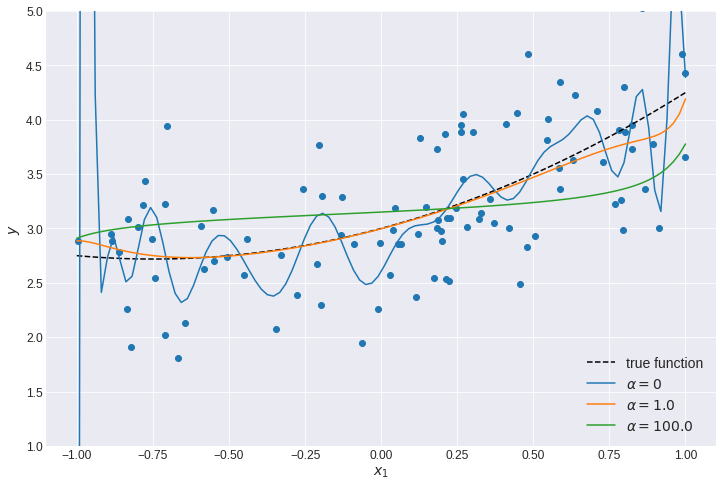

In [8]:
# display the target data, along with the true quadratic function that generated the relationship between
# the variable x and the target value y
plt.scatter(X, y);
x_h = np.linspace(-1.0, 1.0, 100)
y_h = 0.5 * x_h**2.0 + 0.75 * x_h + 3.0
plt.plot(x_h, y_h, 'k--', label='true function')

# add predictions from alpha=0 linear regression
x_h = x_h.reshape(-1,1)
plt.plot(x_h, ridge_reg_0.predict(x_h), label=r'$\alpha = 0$')

# add predictions from alpha=small ridge regression
x_h = x_h.reshape(-1,1)
plt.plot(x_h, ridge_reg_small.predict(x_h), label=r'$\alpha = 1.0$')

# add predictions from alpha=s1 ridge regression
x_h = x_h.reshape(-1,1)
plt.plot(x_h, ridge_reg_1.predict(x_h), label=r'$\alpha = 100.0$')

# add labels and info to plot
plt.xlabel(r'$x_1$')
plt.ylabel('$y$')
plt.ylim(1, 5)
plt.legend();

Notice that with no regularization ($\alpha = 0$) the model badly overfits, it wiggles and squirms
around to hit the data points, as we saw before.  But adding just the right amount of
regularization, like $\alpha = 1.0$ results in a model that reduces most of the 
unneded high-order polynomial feature weights to 0, and fits the curve relatively well.
If you add on too much regularization, you will end up reducing all feature parameters
to 0, and get a straight line ($\alpha = 100.0$)

If you look at the actual parameters for the $\alpha = 1.0$ ridge regression model, you
will see this.  Recall that the actual data is generated from 
$\frac{1}{2} x^2 + \frac{3}{4} x + 3$

In [9]:
ridge_reg_small['ridge_reg'].intercept_, ridge_reg_small['ridge_reg'].coef_

(array([2.99695626]),
 array([[ 0.74029647,  0.43468632, -0.02365587,  0.05291891, -0.13405115,
         -0.04258525, -0.11296402, -0.05491715, -0.07159168, -0.04085223,
         -0.0341844 , -0.02005261, -0.00472554,  0.0005039 ,  0.01768713,
          0.01849827,  0.03470256,  0.03335539,  0.04768531,  0.0451497 ,
          0.05758924,  0.05418194,  0.06505275,  0.06081163,  0.0705116 ]]))

In [10]:
ridge_reg_1['ridge_reg'].intercept_, ridge_reg_1['ridge_reg'].coef_

(array([3.1507444]),
 array([[0.1348977 , 0.03151784, 0.07039158, 0.02344357, 0.04528714,
         0.01913143, 0.03280266, 0.01662594, 0.02570564, 0.01504103,
         0.02132546, 0.01397533, 0.01846735, 0.01322427, 0.01652499,
         0.01267246, 0.01516119, 0.01225004, 0.01417534, 0.01191296,
         0.01344215, 0.01163275, 0.01288066, 0.01139077, 0.0124373 ]]))

While not perfect, you will see that the first two coefficient, which are the $x^1$ and
$x^2$ coefficients, are generally the larger ones.  Most others are closer to 0, though
the terms that are still powers of 2, like the $x^4, x^8$ etc. tend to be still the higher terms
as they will have similar effects to the $x^2$ term here.

The regularization term we have used for ridge regression is actually the norm of the
feature weight vector (see linear algebra review). This is known as the l-2 (or $\ell_2$) norm.
So in many models you will see l-2 regularization as an option, which is the same thing, adding
on a penality based on the size of the feature weight parameters.

For example, using an `SGDRegressor`, which by default use the RMSE cost function, we can get
ridge regression by asking the regressor object to apply `l2` penality to the cost, which
is the regularization we have been using.

In [11]:
# fit regression using stochastic gradient descent on a degree-25 model
sgd_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=25, include_bias=False)),
    ('sgd_reg', SGDRegressor(penalty='l2', alpha=0.1)),
])
sgd_reg.fit(X, y.ravel())
sgd_reg['sgd_reg'].intercept_, sgd_reg['sgd_reg'].coef_

(array([2.9402143]),
 array([ 0.40506395,  0.40646525,  0.11790221,  0.16906236,  0.04995468,
         0.08526613,  0.02456914,  0.04547564,  0.01258193,  0.02392071,
         0.00610796,  0.01136056,  0.00232519,  0.00370874,  0.00001948,
        -0.00108772, -0.00141159, -0.00415248, -0.00230202, -0.00613755,
        -0.00285205, -0.00743676, -0.00318768, -0.00829475, -0.0033902 ]))

### Lasso Regression

**Least Absolute Shrinkage and Selection Operator Regression** (simply called *lasso regression*)
is another regularized version of linear regression.  Just like ridge regression, it adds
a regularization penality.  But it uses the l-1 ($\ell_1$) norm of the weight vector, which
is just the sum of the absolute values.

$$
J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^{n} |\theta_i|
$$

We can recreate our previous model using a lasso regression instead.  The two types of regularization
penalities have different properties.  The $\ell_1$ regularization using the absolute value will
be more likely to completely eliminate the least important weights of the least important features.
This can be especially useful for the scenario we are using here, as there are no actual
features in the true data relationship above the degree-2 feature.

In [12]:
from sklearn.linear_model import Lasso

In [13]:
# lasso regression using alpha of 0, e.g. just a linear regression
lasso_reg_0 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=25, include_bias=False)),
    ('lasso_reg', Lasso(alpha=0.000000001)),
])
lasso_reg_0.fit(X, y)

/opt/anaconda3/envs/python3-datasci/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.402739577693318, tolerance: 0.004203862922008965
  positive)


Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=25, include_bias=False)),
                ('lasso_reg', Lasso(alpha=1e-09))])

In [14]:
# lasso regression using alpha of 1
lasso_reg_small = Pipeline([
    ('poly_features', PolynomialFeatures(degree=25, include_bias=False)),
    ('lasso_reg', Lasso(alpha=0.01)),
])
lasso_reg_small.fit(X, y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=25, include_bias=False)),
                ('lasso_reg', Lasso(alpha=0.01))])

In [15]:
# lasso regression using alpha of 100
lasso_reg_1 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=25, include_bias=False)),
    ('lasso_reg', Lasso(alpha=1.0)),
])
lasso_reg_1.fit(X, y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=25, include_bias=False)),
                ('lasso_reg', Lasso())])

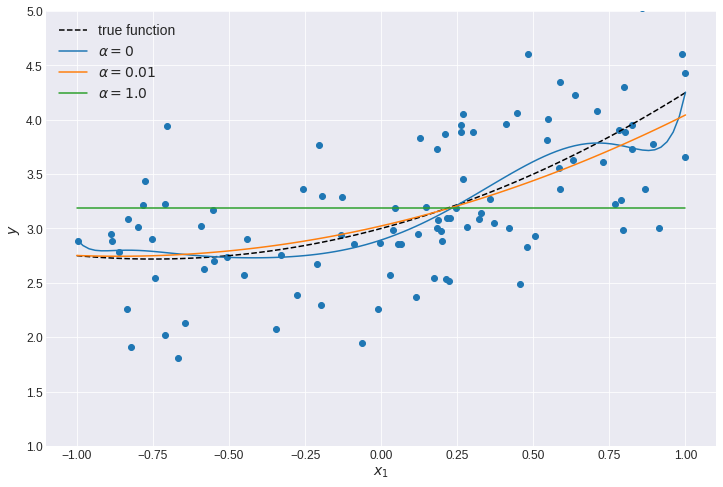

In [16]:
# display the target data, along with the true quadratic function that generated the relationship between
# the variable x and the target value y
plt.scatter(X, y);
x_h = np.linspace(-1.0, 1.0, 100)
y_h = 0.5 * x_h**2.0 + 0.75 * x_h + 3.0
plt.plot(x_h, y_h, 'k--', label='true function')

# add predictions from alpha=0 linear regression
x_h = x_h.reshape(-1,1)
plt.plot(x_h, lasso_reg_0.predict(x_h), label=r'$\alpha = 0$')

# add predictions from alpha=small ridge regression
x_h = x_h.reshape(-1,1)
plt.plot(x_h, lasso_reg_small.predict(x_h), label=r'$\alpha = 0.01$')

# add predictions from alpha=s1 ridge regression
x_h = x_h.reshape(-1,1)
plt.plot(x_h, lasso_reg_1.predict(x_h), label=r'$\alpha = 1.0$')

# add labels and info to plot
plt.xlabel(r'$x_1$')
plt.ylabel('$y$')
plt.ylim(1, 5)
plt.legend();

In [17]:
lasso_reg_small['lasso_reg'].intercept_, lasso_reg_small['lasso_reg'].coef_

(array([3.0231127]),
 array([ 0.64624797,  0.37454171, -0.        ,  0.        , -0.        ,
         0.        , -0.        ,  0.        , -0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]))

In [18]:
lasso_reg_1['lasso_reg'].intercept_, lasso_reg_1['lasso_reg'].coef_

(array([3.19271936]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]))

Notice the effect is particularly good here when we get the $\alpha$ parameter
at a good level for this data.  Lasso eliminates all of the highre order terms, and
even though we have a highly powered model, determines it only needs the $x^1$ and $x^2$
feater weights to model the data well.

Notice also again that when the hyperparameter $\alpha$ is too large, all weights
are eliminated, and we end up with a straight line prediction that goes through
the mean value of the data.

Note that in the above example, we could again instead also use `SGDRegressor` but with
a `penality="l1"` to obtain the same cost function as the lasso regression.

### Elastic Net

If you understand ridge regression and the $\ell_2$ regularization penality using the squares of the
weights, and lasso regression and the $ell_1$ regularization penality using the absolute
values, then an elastic net is a simple combination of the two.

The equation for an elastic net regression where we combine both types of regularization is

$$
J(\theta) = MSE(\theta) + r \alpha \sum_{i=1}^n |\theta-i| + \frac{1 - r}{2} \alpha \sum_{i=1}^n \theta_i^2
$$

Here $\alpha$ controls the importance of both of the regularization penalities.  $r$ is another hyperparameter
that determins the mixing of the two types of regularization.  When $r = 0$ of course
there is no $\ell_1$ regularization, so this is equivalant to using only $\ell_2$
regularization.  And similarly when $r = 1$ the $\ell_2$ regularization drops out and
you only have $\ell_1$ regularization.  A value in between will result in a mix
of the two types.

So when should you use $\ell_1$ vs $\ell_2$ or both?  It is almost always preferable to
use a model that is too powerful, and explore regularization hyperparameters to reduce
the model complexity to better fit the bias / variance tradeoff.  Ridge / $\ell_2$ is a
good default to try first, because usually all or many of the features may actually be
useful in predicting your data.  But if you suspect that some or many of your features are actually
not useful predictors, then using lasso / $\ell_1$ regularization is the way to go, as we just
demonstrated in our examples with our random data.

Scikit-learn also has an `ElasticNet` class you may use.  Notice you use the
named parameter `l1_ratio=0.5` to specify the `r` value, e.g. the balance between
l-1 and l-2 regularization.

In [19]:
from sklearn.linear_model import ElasticNet

elastic_net_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=25, include_bias=False)),
    ('elastic_net_reg', ElasticNet(alpha=0.01, l1_ratio=0.5)),
])
elastic_net_reg.fit(X, y)
elastic_net_reg['elastic_net_reg'].intercept_, elastic_net_reg['elastic_net_reg'].coef_,

(array([3.01219137]),
 array([ 0.65133732,  0.40855075, -0.        ,  0.        , -0.        ,
         0.        , -0.        ,  0.        , -0.        ,  0.        ,
        -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]))

### Early Stopping

A very different way to regularize iterative learning algorithms such as
gradient descent is to employ **early stopping**.  For any model you
are training with an iterative learning algorithm, the validation error should start off
initially high, but will reduce along with the training error.  However, 
for a model that will overfit, at some point the training set error will continue to reduce,
but the validation error will begin to rise again.  This is the point where the
model has begun to overfit the data.  If you detect and stop training at this point (or keep
a history so you can use the model when reached at this point), then you can effectively
also reduce overfitting.  

However determining when this point occurs can be a challenge.  With stochastic and
mini-batch gradient descent, the error curves will not decrease smoothly.  So determining when
the average validation / test cost has stopped decreasing and is starting to increase can
be a challenge.  Likewise, you can also be stuck in plateaus, so it can be easy to misidentify 
a long slow crawl on a plateau for the end of making progress on the validation error.